<a href="https://colab.research.google.com/github/mani-droid/data-science-projects/blob/master/Q_Learning_FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [3]:
!pip install gymnasium pygame -q

import numpy as np
import pandas as pd
import gymnasium as gym
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output

**Create the FrozenLake Environment**

In [4]:
env = gym.make("FrozenLake-v1", is_slippery = False)
state_space = env.observation_space.n
action_space = env.action_space.n

print(f"Number of States: {state_space}")
print(f"Number of Actions: {action_space}")

Number of States: 16
Number of Actions: 4


**Initialize Q-Table with zeros and Hyperparameters**

In [5]:
q_table = np.zeros((state_space, action_space))

alpha = 0.8
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.999
epsilon_min = 0.01
episodes = 2000
max_steps =100

rewards = []

**Q Learning Main Loop**

In [6]:
for episode in range(episodes):
  state, _ = env.reset()
  total_reward = 0

  for step in range(max_steps):

    if random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(q_table[state])

    new_state, reward, terminated, truncated, _ = env.step(action)

    q_table[state][action] = q_table[state][action] + alpha * (reward + gamma * np.max(q_table[new_state]) - q_table[state][action])


    state = new_state
    total_reward +=reward

    if terminated or truncated:
      break


  epsilon = max(epsilon * epsilon_decay, epsilon_min)
  rewards.append(total_reward)


  if episode % 100 == 0:
    clear_output(wait = True)
    print(f"Episode:{episode}, Avg Reward: {np.mean(rewards[-100:]):.2f},  Epsilon: {epsilon:.2f}")

Episode:1900, Avg Reward: 0.86,  Epsilon: 0.15


**Plot the reward over Episodes**

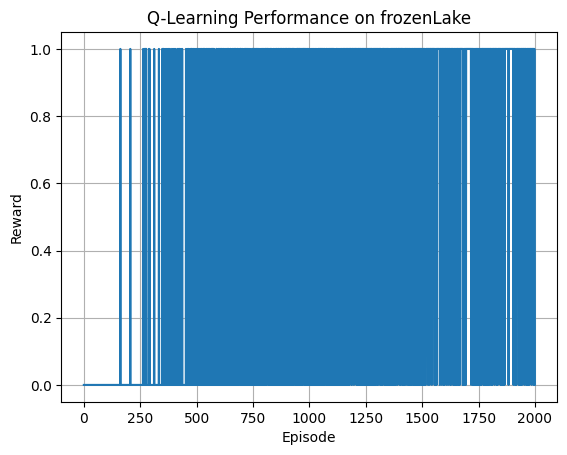

In [7]:
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Q-Learning Performance on frozenLake")
plt.grid()
plt.show()

**Test the Learned Policy: Run the environment using the trained Q-table**

In [10]:
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi")

for episodes in range(5):
  state, _ =env.reset()
  done = False
  print(f"\nEpisode {episode +1 }")
  time_step = 0

  while not done:
    action = np.argmax(q_table[state])
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    print(env.render())
    time_step +=1


Episode 2000
  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG


Episode 2000
  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG


Episode 2000
  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG


Episode 2000
  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG


Episode 2000
  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

